In [235]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt


def extract_row(file_path, name):
# Input: file_path string and key string (to search in first col)
# Output: np.array of values 

    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if row and name in row[0]:
                return np.array([float(value) for value in row[1:]])
    return np.array([])

In [236]:
extract_row("treatment1_13Aug.csv", "Aadya-totalProcessingDelay" )

array([ 0.      ,  0.559797,  1.134324,  1.690997,  2.309364,  2.893046,
        3.538567,  4.145332,  4.738183,  5.265417,  5.786722,  7.272796,
        9.886494, 12.353205, 15.299668, 16.858892, 20.3022  , 23.548513,
       27.39304 , 31.740465, 36.016703, 40.067496, 43.743242, 47.155873,
       49.83135 , 50.953972, 54.341651, 58.374566, 62.40629 , 66.263463,
       69.932294])

In [237]:
import matplotlib.pyplot as plt

def plot_array(values, title="Plot", xlabel="Time [s]", ylabel="Value"):
    """
    Plots a NumPy array.

    Parameters:
        values (np.array): The array to be plotted.
        title (str): The title of the plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(0, len(values)), values, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [238]:
import matplotlib.pyplot as plt

def plot_multiple_arrays(arrays, labels=None, title="Plot", xlabel="Time [s]", ylabel="Value"):
    plt.figure(figsize=(10, 6))
    
    for i, values in enumerate(arrays):
        # Generate x values according to the length of each array
        x_values = np.arange(0, len(values))
        # Plot each array
        plt.plot(x_values, values, marker=' ', label=labels[i] if labels else f"Series {i+1}")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

In [239]:
file_path1 = 'treatment1_13Aug.csv'
file_path2= 'treatment2_13Aug.csv'
file_path3= 'treatment3_13Aug.csv'
file_path4= 'treatment4_13Aug.csv'
file_path5= 'treatment5_13Aug_aadya_only.csv'

def get_values(key):
    values1 = extract_row(file_path1, key)
    values2 = extract_row(file_path2, key)
    values3 = extract_row(file_path3, key)
    values4 = extract_row(file_path4, key)
    values5 = extract_row(file_path5, key)
    return [values1,values2, values3, values4, values5 ]

def get_values_ellen(key):
    values1 = extract_row(file_path1, key)
    values2 = extract_row(file_path2, key)
    values3 = extract_row(file_path3, key)
    values4 = extract_row(file_path4, key)
    #values5 = extract_row(file_path5, key)
    return [values1,values2, values3, values4]

Plot a stat over time for multiple calls at once

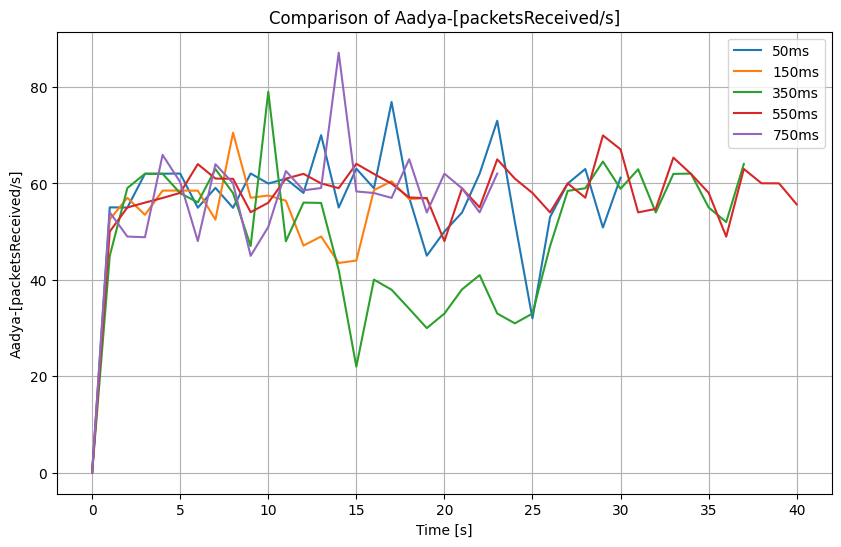

In [240]:
key = 'Aadya-[packetsReceived/s]' #stat to compare across latencies
plot_multiple_arrays(get_values(key), labels=["50ms", "150ms", "350ms", "550ms" ,"750ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

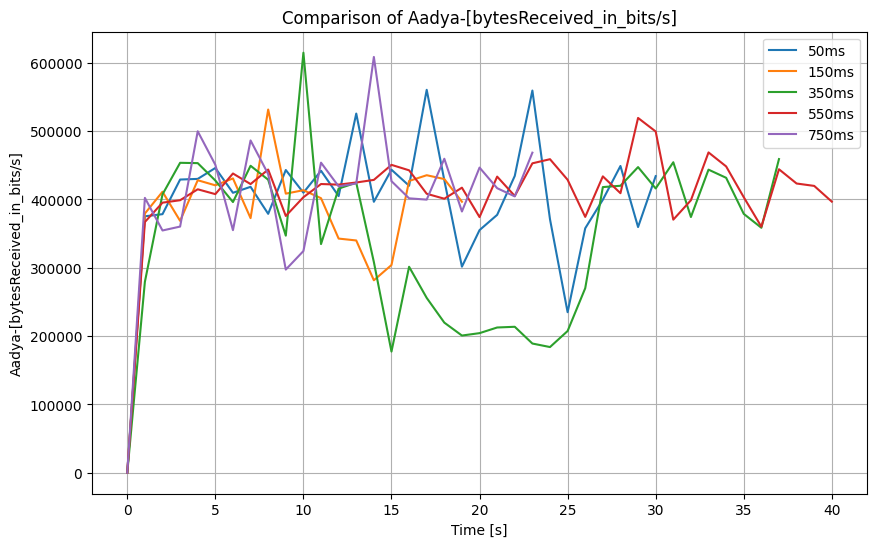

In [241]:
key = 'Aadya-[bytesReceived_in_bits/s]' #stat to compare across latencies
plot_multiple_arrays(get_values(key), labels=["50ms", "150ms", "350ms", "550ms", "750ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

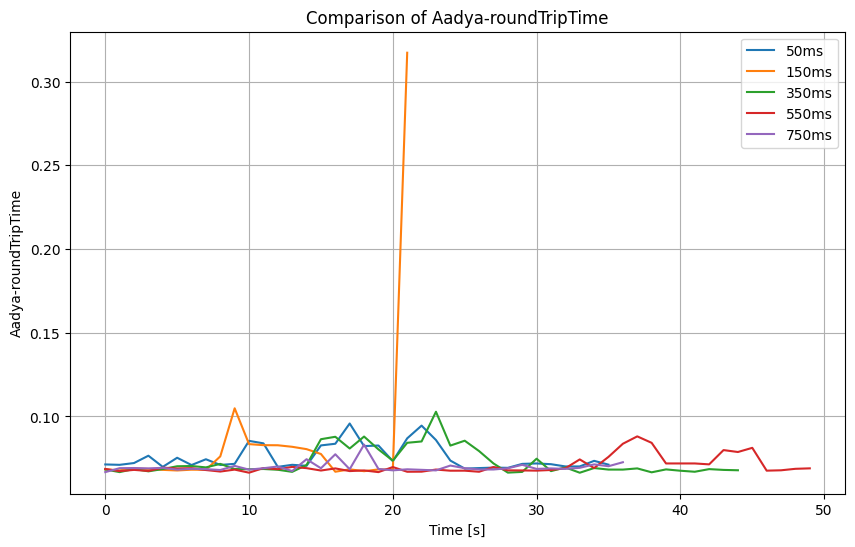

In [242]:
key = 'Aadya-roundTripTime' #stat to compare across latencies
plot_multiple_arrays(get_values(key), labels=["50ms", "150ms", "350ms", "550ms", "750ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

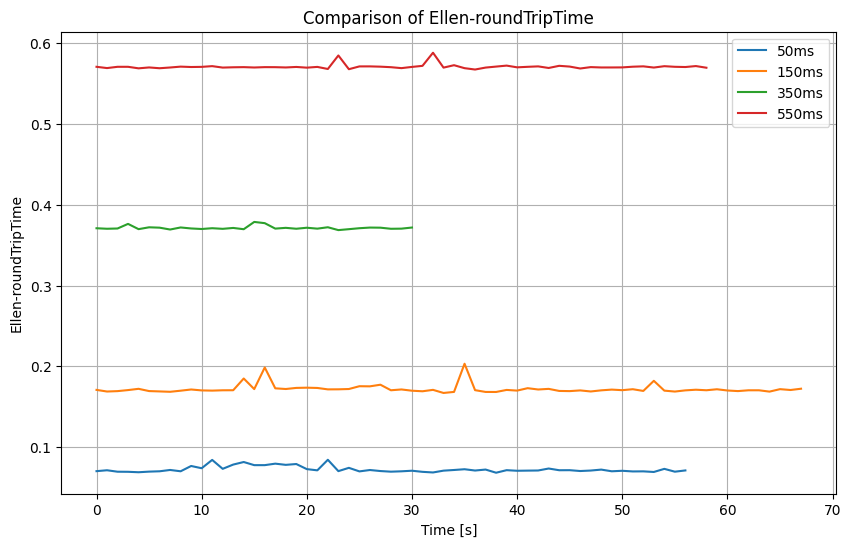

In [243]:
key = 'Ellen-roundTripTime' #stat to compare across latencies
plot_multiple_arrays(get_values_ellen(key), labels=["50ms", "150ms", "350ms", "550ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

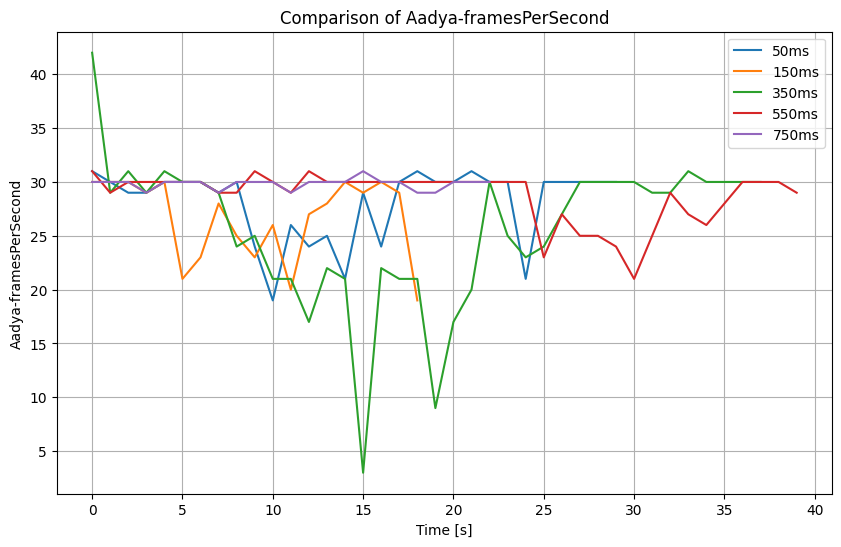

In [244]:
key = 'Aadya-framesPerSecond' #stat to compare across latencies
plot_multiple_arrays(get_values(key), labels=["50ms", "150ms", "350ms", "550ms", "750ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

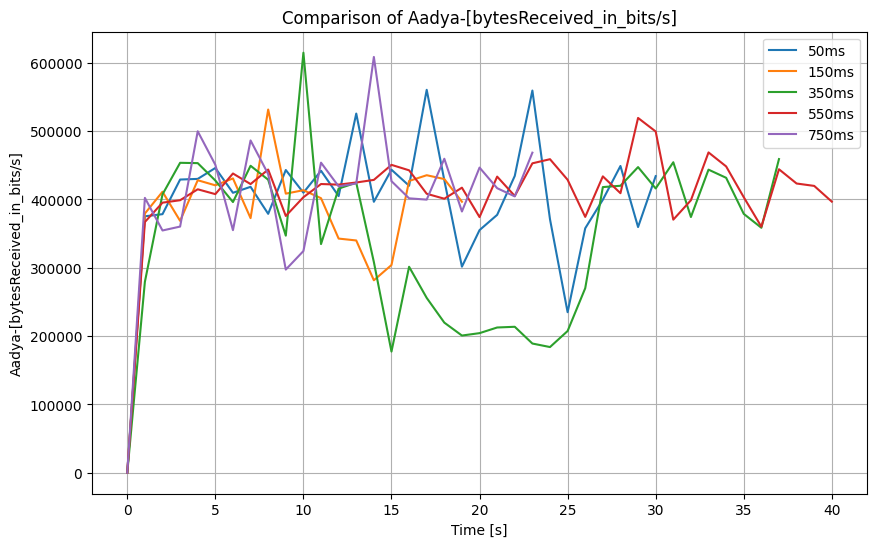

In [245]:
key = 'Aadya-[bytesReceived_in_bits/s]' #stat to compare across latencies
plot_multiple_arrays(get_values(key), labels=["50ms", "150ms", "350ms", "550ms", "750ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

In [246]:
def get_values_diff_keys(key1, key2, file_path):
    values1 = extract_row(file_path, key1)
    values2 = extract_row(file_path, key2)
    return [values1,values2]

def get_values_3_keys(key1, key2, key3, file_path):
    values1 = extract_row(file_path, key1)
    values2 = extract_row(file_path, key2)
    values3 = extract_row(file_path, key3)
    return [values1,values2, values3]

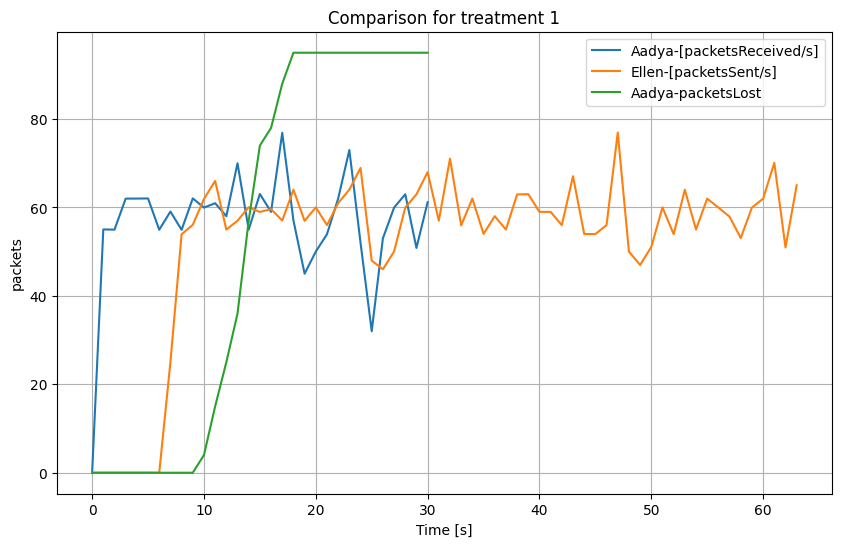

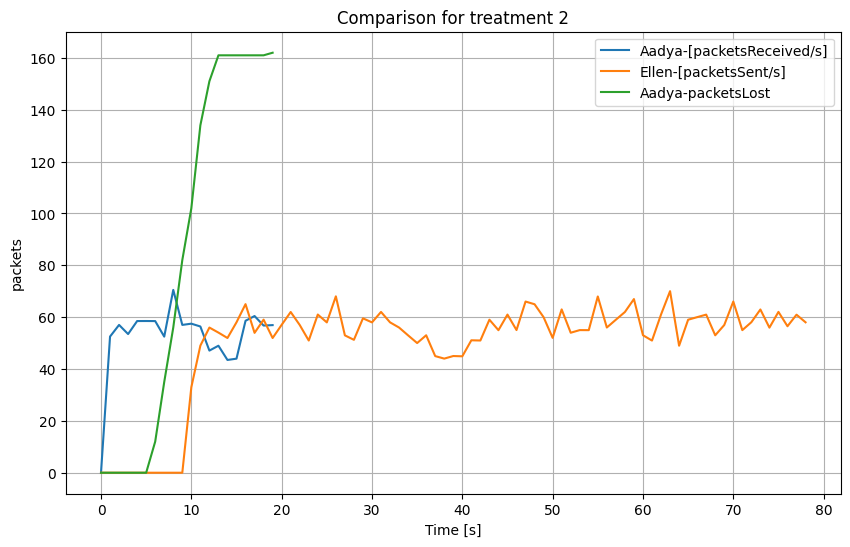

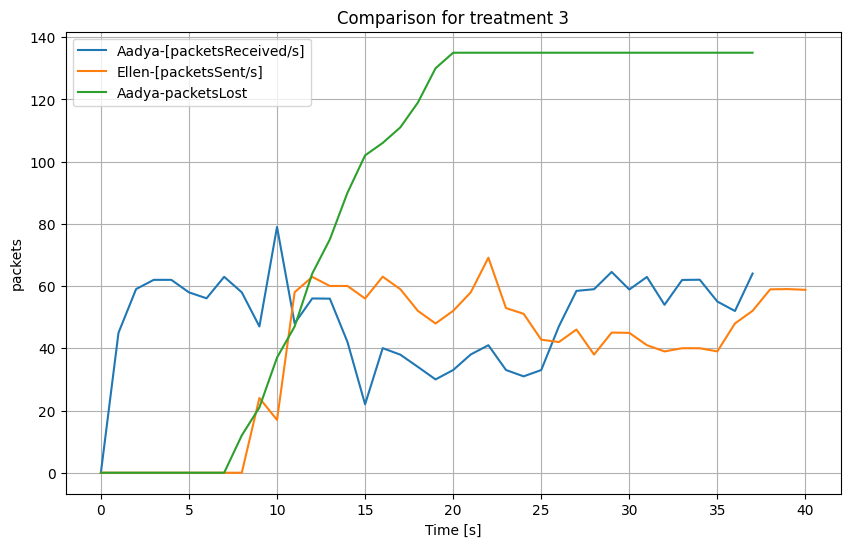

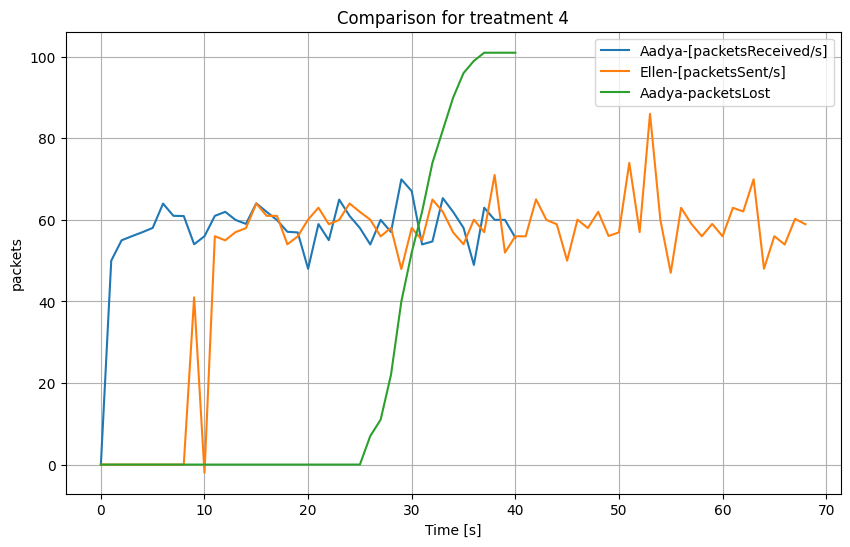

In [247]:
key1 = 'Aadya-[packetsReceived/s]'
key2 = 'Ellen-[packetsSent/s]'
key3 = 'Aadya-packetsLost'
file_paths = [file_path1, file_path2, file_path3, file_path4]
for filepath in file_paths:
    plot_multiple_arrays(get_values_3_keys(key1, key2, key3, filepath), labels=[key1, key2, key3], title=str("Comparison for treatment " + filepath[9]), xlabel="Time [s]", ylabel="packets")

In [248]:
def plot_with_two_y_axes(y1, y2, y1_label='Y1 data', y2_label='Y2 data', title='Comparison'):
    x1 = np.arange(0, len(y1))
    x2 = np.arange(0, len(y2))

    fig, ax1 = plt.subplots()

    # Plot on the first y-axis
    ax1.plot(x1, y1, color= 'green', linestyle = '-')
    ax1.set_xlabel("Time [s]")
    ax1.set_ylabel(y1_label, color='green')
    ax1.tick_params('y', colors='green')

    # Create a second y-axis and plot on it
    ax2 = ax1.twinx()
    ax2.plot(x2, y2, color = 'purple', linestyle = '-')
    ax2.set_ylabel(y2_label, color='purple')
    ax2.tick_params('y', colors='purple')

    plt.title(title)
    plt.show()


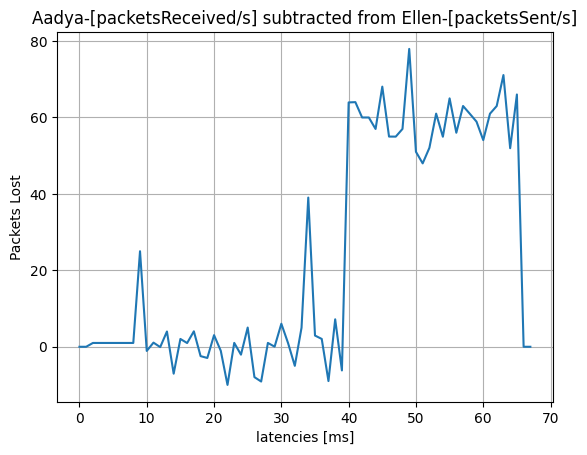

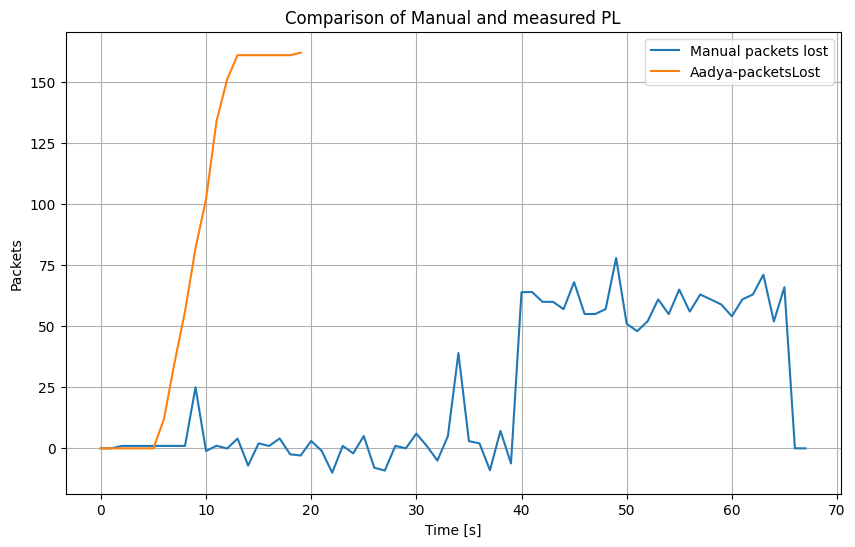

In [249]:
key1 = 'Aadya-[packetsReceived/s]'
key2 = 'Ellen-[packetsSent/s]'
key3 = 'Aadya-packetsLost'
file_paths = [file_path1, file_path2, file_path3, file_path4]
res_array = []
for filepath in file_paths:
     res_array += get_values_diff_keys(key1, key2, filepath)
file_path = '/Users/User/Desktop/test calls 13 august/TIMED/treatment1_13Aug.csv'
array1, array2 = get_values_diff_keys(key1, key2, file_path)
diff = array2 - array1
xvals = np.arange(0, len(diff))
plt.plot(xvals, diff, marker='', linestyle= '-')
plt.title(key1+ " subtracted from " + key2)
plt.xlabel("latencies [ms]")
plt.ylabel('Packets Lost')
plt.grid(True)
plt.show()

arrays_forthis = diff, get_values(key3)[1]
plot_multiple_arrays(arrays_forthis, labels=["Manual packets lost", "Aadya-packetsLost"], title=str("Comparison of Manual and measured PL"), xlabel="Time [s]", ylabel="Packets")

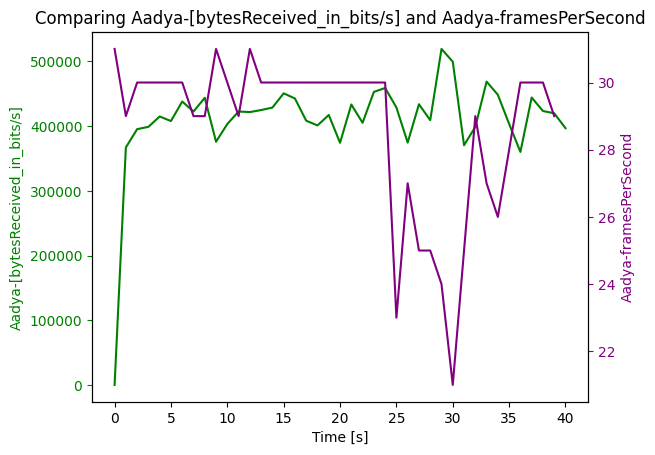

In [250]:
key1 = 'Aadya-[bytesReceived_in_bits/s]'
key2 = 'Aadya-framesPerSecond'
y1, y2 = get_values_diff_keys(key1, key2, file_path4)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2) )

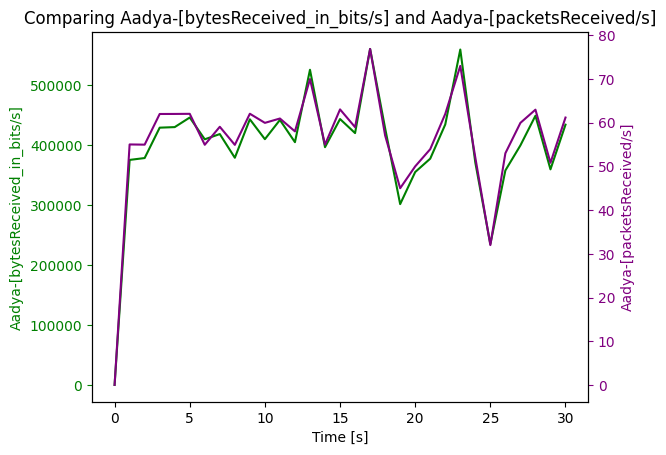

In [251]:
key1 = 'Aadya-[bytesReceived_in_bits/s]'
key2 = 'Aadya-[packetsReceived/s]'
y1, y2 = get_values_diff_keys(key1, key2, file_path1)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2) )

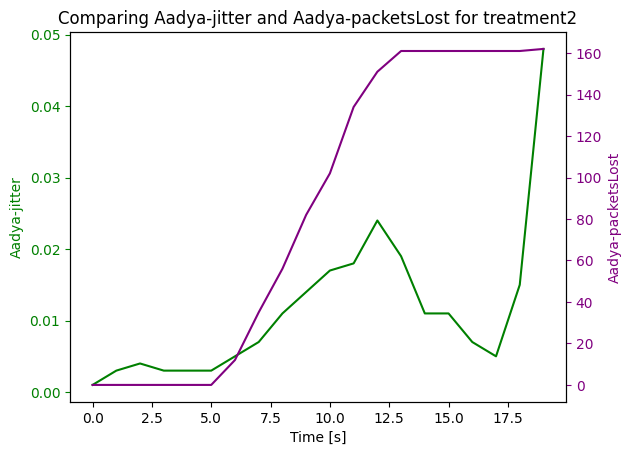

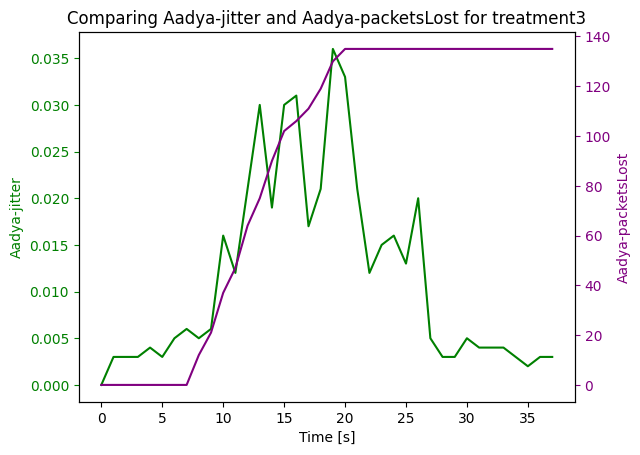

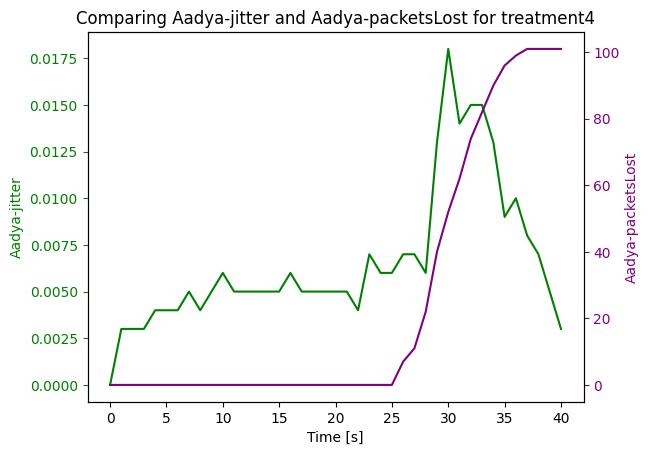

In [252]:
key1 = 'Aadya-jitter'
key2 = 'Aadya-packetsLost'
file_path = file_path2
y1, y2 = get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for treatment" + file_path[9] ) )
file_path = file_path3
y1, y2 = get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for treatment" + file_path[9] ) )
file_path = file_path4
y1, y2 = get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for treatment" + file_path[9] ) )


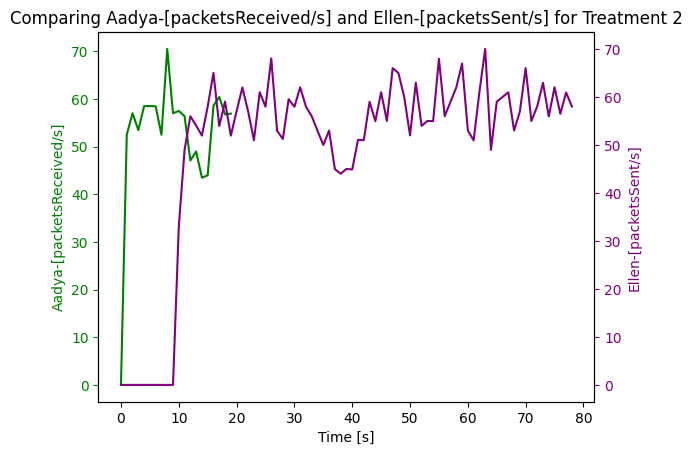

In [253]:
key1 = 'Aadya-[packetsReceived/s]'
key2 = 'Ellen-[packetsSent/s]'
file_path = file_path2
y1, y2= get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for Treatment "+ file_path[9] ) )

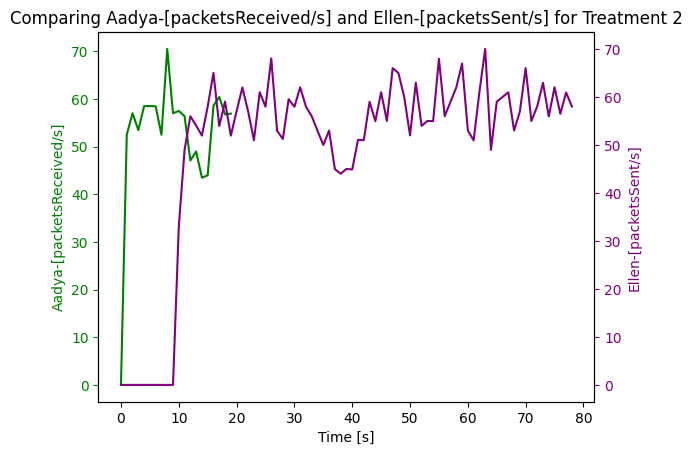

In [254]:
key1 = 'Aadya-[packetsReceived/s]'
key2 = 'Ellen-[packetsSent/s]'
file_path = file_path2
y1, y2= get_values_diff_keys(key1, key2, file_path)
plot_with_two_y_axes(y1, y2, key1, key2, title= str("Comparing " + key1 + " and " + key2 + " for Treatment "+ file_path[9] ) )

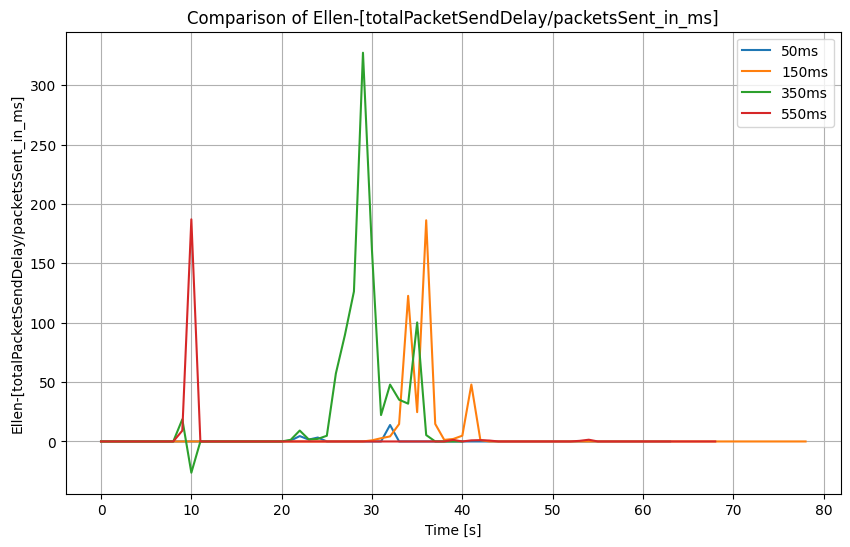

In [255]:
key = 'Ellen-[totalPacketSendDelay/packetsSent_in_ms]' #stat to compare across latencies
plot_multiple_arrays(get_values_ellen(key), labels=["50ms", "150ms", "350ms", "550ms"], title=str("Comparison of " + key), xlabel="Time [s]", ylabel=key)

The following code is for values that are cumulative, and we can graph the ratio of the stat to the call length against the latencies

In [256]:
def get_last_value(key):
    values1 = extract_row(file_path1, key)
    values2 = extract_row(file_path2, key)
    values3 = extract_row(file_path3, key)
    values4 = extract_row(file_path4, key)
    values5 = extract_row(file_path5, key)
    return np.array([values1[-1],values2[-1], values3[-1],values4[-1], values5[-1]]), np.array( [len(values1), len(values2), len(values3), len(values4),  len(values5)])

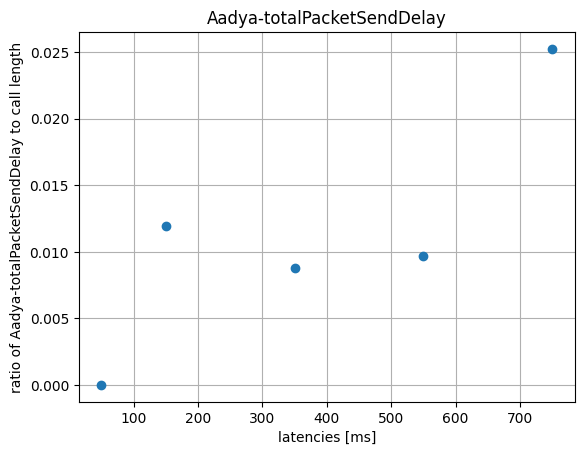

In [257]:
keycumulative = 'Aadya-totalPacketSendDelay' #replace with cumulative stat
array1, array2 = get_last_value(keycumulative)
stat_ratio = array1 / array2

plt.plot([50, 150, 350, 550, 750], stat_ratio, marker='o', linestyle= '')
plt.title(keycumulative)
plt.xlabel("latencies [ms]")
plt.ylabel("ratio of " + keycumulative + " to call length")
plt.grid(True)
plt.show()

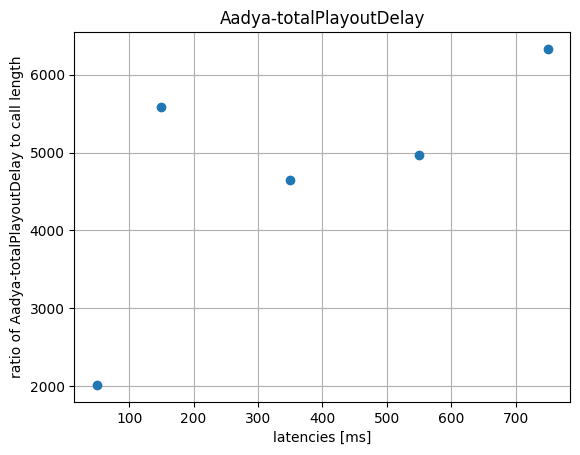

In [258]:
keycumulative = 'Aadya-totalPlayoutDelay' #replace with cumulative stat
array1, array2 = get_last_value(keycumulative)
stat_ratio = array1 / array2

plt.plot([50, 150, 350, 550, 750], stat_ratio, marker='o', linestyle= '')
plt.title(keycumulative)
plt.xlabel("latencies [ms]")
plt.ylabel("ratio of " + keycumulative + " to call length")
plt.grid(True)
plt.show()

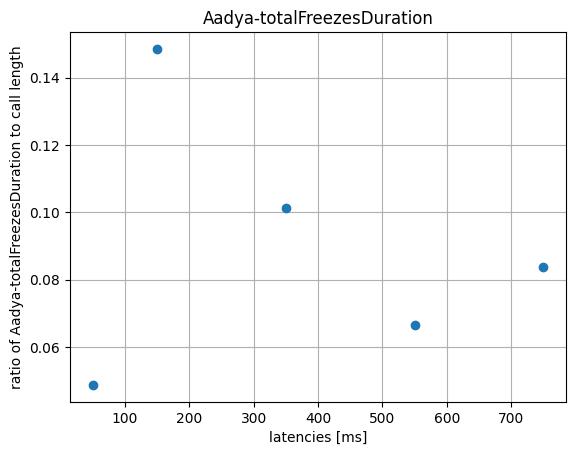

In [259]:
keycumulative = 'Aadya-totalFreezesDuration' #replace with cumulative stat
array1, array2 = get_last_value(keycumulative)
stat_ratio = array1 / array2

plt.plot([50, 150, 350, 550, 750], stat_ratio, marker='o', linestyle= '')
plt.title(keycumulative)
plt.xlabel("latencies [ms]")
plt.ylabel("ratio of " + keycumulative + " to call length")
plt.grid(True)
plt.show()

In [260]:
file_path6= 'treatment6_13Aug_aadya_only.csv'
file_path7= 'treatment7_13Aug.csv'
file_path8= 'treatment8_13Aug.csv'
file_path9= 'treatment9_13Aug.csv'
file_path10= 'treatment10_13Aug.csv'
file_path12= 'treatment12_13Aug_aadya_only.csv'
file_path13= 'treatment13_13Aug.csv'

def get_last_value_678(key):
    values1 = extract_row(file_path6, key)
    values2 = extract_row(file_path7, key)
    values3 = extract_row(file_path8, key)
    return np.array([values1[-1],values2[-1], values3[-1]]), np.array([len(values1), len(values2), len(values3)])

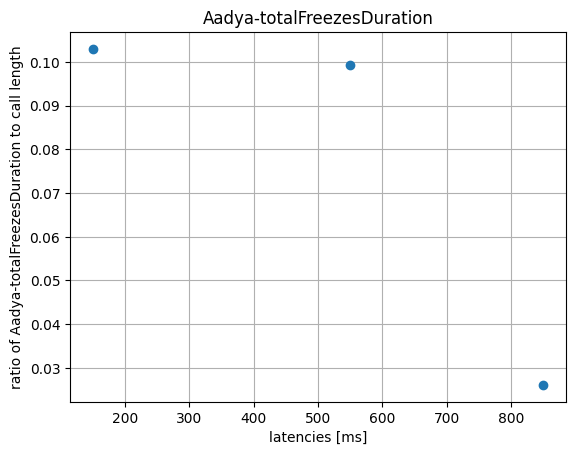

In [261]:
key_cumulative = 'Aadya-totalFreezesDuration' #replace with cumulative stat
array1, array2 = get_last_value_678(key_cumulative)
statratio = array1 / array2

plt.plot([150, 550, 850], statratio, marker='o', linestyle = '')
plt.title(key_cumulative)
plt.xlabel("latencies [ms]")
plt.ylabel("ratio of " + key_cumulative + " to call length")
plt.grid(True)
plt.show()